In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/gdrive/My Drive/JST/datasets/BA_AirlineReviews_CL_excel.xlsx')

In [ ]:
kepuasan_mapping = {
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very Satisfied': 5,
    'Delighted': 6,
    'Extremely Satisfied': 7,
    'Enthusiastic': 8,
    'Advocate': 9,
    'Evangelist': 10
}

df['Satisfaction'] = df['Satisfaction'].replace(kepuasan_mapping)

In [ ]:
def isi_missing(row):
    if row['Satisfaction'] in [1, 2]:
        return 1
    elif row['Satisfaction'] in [3, 4]:
        return 2
    elif row['Satisfaction'] in [5, 6]:
        return 3
    elif row['Satisfaction'] in [7, 8]:
        return 4
    else:
        return 5

# Menggunakan metode apply untuk menerapkan fungsi pada setiap baris
for kolom in ['SeatComfort', 'CabinStaffService', 'GroundService', 'Food&Beverages', 'InflightEntertainment', 'Wifi&Connectivity', 'ValueForMoney']:
    df[kolom] = df.apply(lambda row: isi_missing(row) if pd.isna(row[kolom]) else row[kolom], axis=1)

In [ ]:
df.at[2952, 'SeatType'] = 'Business Class'
df.at[2911, 'SeatType'] = 'Economy Class'

In [ ]:
ekonomi_data = df[df['SeatType'] == 'Economy Class']
bisnis_data = df[df['SeatType'] == 'Business Class']
premium_data = df[df['SeatType'] == 'Premium Economy']
first_data = df[df['SeatType'] == 'First Class']

In [ ]:
train_ekonomi, test_ekonomi = train_test_split(ekonomi_data, test_size=0.5, random_state=42)
train_bisnis, test_bisnis = train_test_split(bisnis_data, test_size=0.5, random_state=42)
train_first, test_first = train_test_split(first_data, test_size=0.5, random_state=42)
train_premium, test_premium = train_test_split(premium_data, test_size=0.5, random_state=42)

train_main50 = pd.concat([train_ekonomi, train_bisnis, train_first, train_premium], ignore_index=True)
test_main50 = pd.concat([test_ekonomi, test_bisnis, test_first, test_premium], ignore_index=True)

In [ ]:
train_ekonomi, test_ekonomi = train_test_split(ekonomi_data, test_size=0.3, random_state=42)
train_bisnis, test_bisnis = train_test_split(bisnis_data, test_size=0.3, random_state=42)
train_first, test_first = train_test_split(first_data, test_size=0.3, random_state=42)
train_premium, test_premium = train_test_split(premium_data, test_size=0.3, random_state=42)

train_main70 = pd.concat([train_ekonomi, train_bisnis, train_first, train_premium], ignore_index=True)
test_main30 = pd.concat([test_ekonomi, test_bisnis, test_first, test_premium], ignore_index=True)

In [ ]:
train_ekonomi, test_ekonomi = train_test_split(ekonomi_data, test_size=0.1, random_state=42)
train_bisnis, test_bisnis = train_test_split(bisnis_data, test_size=0.1, random_state=42)
train_first, test_first = train_test_split(first_data, test_size=0.1, random_state=42)
train_premium, test_premium = train_test_split(premium_data, test_size=0.1, random_state=42)

train_main90 = pd.concat([train_ekonomi, train_bisnis, train_first, train_premium], ignore_index=True)
test_main10 = pd.concat([test_ekonomi, test_bisnis, test_first, test_premium], ignore_index=True)

In [ ]:
kolom_yang_dihapus = ['id', 'ReviewHeader', 'Name', 'Datetime', 'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route', 'DateFlown', 'Recommended', 'Aircraft']
train_main50 = train_main50.drop(kolom_yang_dihapus, axis=1)
kolom_yang_dihapus = ['id', 'ReviewHeader', 'Name', 'Datetime', 'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route', 'DateFlown', 'Recommended', 'Aircraft']
test_main50 = test_main50.drop(kolom_yang_dihapus, axis=1)

In [ ]:
kolom_yang_dihapus = ['id', 'ReviewHeader', 'Name', 'Datetime', 'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route', 'DateFlown', 'Recommended', 'Aircraft']
train_main70 = train_main70.drop(kolom_yang_dihapus, axis=1)
kolom_yang_dihapus = ['id', 'ReviewHeader', 'Name', 'Datetime', 'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route', 'DateFlown', 'Recommended', 'Aircraft']
test_main30 = test_main30.drop(kolom_yang_dihapus, axis=1)

In [ ]:
kolom_yang_dihapus = ['id', 'ReviewHeader', 'Name', 'Datetime', 'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route', 'DateFlown', 'Recommended', 'Aircraft']
train_main90 = train_main90.drop(kolom_yang_dihapus, axis=1)
kolom_yang_dihapus = ['id', 'ReviewHeader', 'Name', 'Datetime', 'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route', 'DateFlown', 'Recommended', 'Aircraft']
test_main10 = test_main10.drop(kolom_yang_dihapus, axis=1)

In [ ]:
truth_train_main50 = train_main50['Satisfaction']
train_main50 = train_main50.drop('Satisfaction', axis=1)
truth_test_main50 = test_main50['Satisfaction']
test_main50 = test_main50.drop('Satisfaction', axis=1)

In [ ]:
truth_train_main70 = train_main70['Satisfaction']
train_main70 = train_main70.drop('Satisfaction', axis=1)
truth_test_main30 = test_main30['Satisfaction']
test_main30 = test_main30.drop('Satisfaction', axis=1)

In [ ]:
truth_train_main90 = train_main90['Satisfaction']
train_main90 = train_main90.drop('Satisfaction', axis=1)
truth_test_main10 = test_main10['Satisfaction']
test_main10 = test_main10.drop('Satisfaction', axis=1)

In [ ]:
from sklearn.neural_network import MLPClassifier

# define and train an MLPClassifier named mlp on the given data
mlp = MLPClassifier(hidden_layer_sizes=(25,50,50,25), max_iter=60, activation='relu', solver='adam', random_state=1)


In [ ]:
mlp.fit(train_main50, truth_train_main50)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(25, 50, 50, 25), max_iter=60, random_state=1)

Accuracy
0.6608977825851812


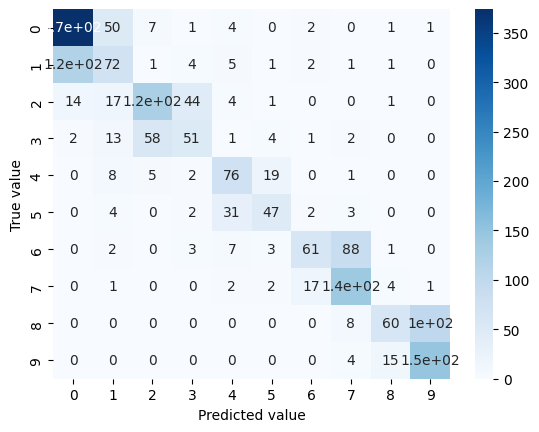

In [ ]:
print('Accuracy')
print(mlp.score(train_main50, truth_train_main50))

# draw the confusion matrix
predict = mlp.predict(test_main50)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(truth_test_main50, predict)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

In [ ]:
print("MSE: %f" % mean_squared_error(truth_test_main50, predict))
print("Test set score: %f" % mlp.score(test_main50, truth_test_main50))
print("Precision test: %f" % precision_score(truth_test_main50, predict, average='weighted'))
print("Recall test: %f" % recall_score(truth_test_main50, predict, average='weighted'))
print("F1 Score test: %f" % f1_score(truth_test_main50, predict, average='weighted'))

print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(train_main50, truth_train_main50))

MSE: 0.933585
Test set score: 0.623650
Precision test: 0.626856
Recall test: 0.623650
F1 Score test: 0.607226
Training error: 0.848217
Training set score: 0.660898


In [ ]:
mlp.fit(train_main70, truth_train_main70)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(25, 50, 50, 25), max_iter=60, random_state=1)

Accuracy
0.6770954036307455


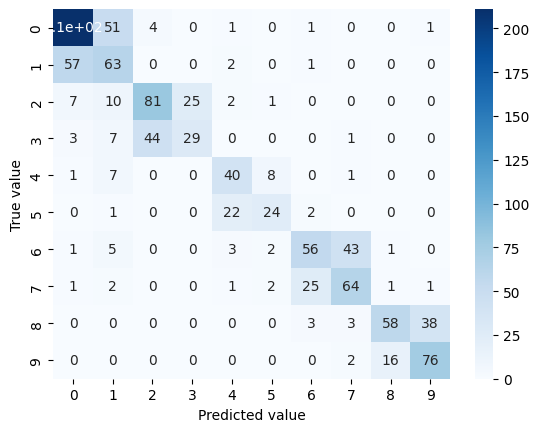

In [ ]:
print('Accuracy')
print(mlp.score(train_main70, truth_train_main70))

# draw the confusion matrix
predict = mlp.predict(test_main30)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(truth_test_main30, predict)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

In [ ]:
print("MSE: %f" % mean_squared_error(truth_test_main30, predict))
print("Test set score: %f" % mlp.score(test_main30, truth_test_main30))
print("Precision test: %f" % precision_score(truth_test_main30, predict, average='weighted'))
print("Recall test: %f" % recall_score(truth_test_main30, predict, average='weighted'))
print("F1 Score test: %f" % f1_score(truth_test_main30, predict, average='weighted'))

print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(train_main70, truth_train_main70))

MSE: 0.987410
Test set score: 0.631295
Precision test: 0.636429
Recall test: 0.631295
F1 Score test: 0.627843
Training error: 0.823763
Training set score: 0.677095


In [ ]:
mlp.fit(train_main90, truth_train_main90)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(25, 50, 50, 25), max_iter=60, random_state=1)

Accuracy
0.6608591168519075


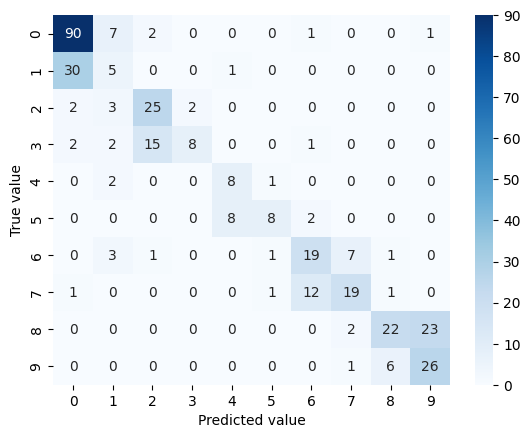

In [ ]:
print('Accuracy')
print(mlp.score(train_main90, truth_train_main90))

# draw the confusion matrix
predict = mlp.predict(test_main10)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(truth_test_main10, predict)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

In [ ]:
print("MSE: %f" % mean_squared_error(truth_test_main10, predict))
print("Test set score: %f" % mlp.score(test_main10, truth_test_main10))
print("Precision test: %f" % precision_score(truth_test_main10, predict, average='weighted'))
print("Recall test: %f" % recall_score(truth_test_main10, predict, average='weighted'))
print("F1 Score test: %f" % f1_score(truth_test_main10, predict, average='weighted'))

print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(train_main90, truth_train_main90))

MSE: 1.255376
Test set score: 0.618280
Precision test: 0.622172
Recall test: 0.618280
F1 Score test: 0.597253
Training error: 0.801574
Training set score: 0.660859
